In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Udemy/1.Amazon Use-case/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#creating extra column called helpful% for upvotes
df['Helpful%'] = np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [ ]:
df['Helpful%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [ ]:
#creating bins regarding % of upvotes
df['%upvote'] = pd.cut(df['Helpful%'],bins=[-1,0,0.2,0.4,0.6,0.8,1],labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [ ]:
df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ...  Summary    Text  Helpful%
Score %upvote                             ...                           
1     Empty      8060       8060    8060  ...     8060    8060      8060
      0-20%      2338       2338    2338  ...     2338    2338      2338
      20-40%     4649       4649    4649  ...     4649    4649      4649
      40-60%     6586       6586    6586  ...     6586    6586      6586
      60-80%     5838       5838    5838  ...     5838    5838      5838
      80-100%   12531      12531   12531  ...    12531   12531     12531
2     Empty      4234       4234    4234  ...     4234    4234      4234
      0-20%       762        762     762  ...      737     762       762
      20-40%     1618       1618    1618  ...     1618    1618      1618
      40-60%     3051       3051    3051  ...     3051    3051      3051
      60-80%     2486       2486    2486  ...     2486    2486      2486
      80-100%    7014       7014    7014  ...     7014    7014      7014
3     Empty      5062       5062    5062  ...     5062    5062      5062
      0-20%       474        474     474  ...      474     474       474
      20-40%     1506       1506    1506  ...     1506    1506      1506
      40-60%     3384       3384    3384  ...     3384    3384      3384
      60-80%     2754       2754    2754  ...     2754    2754      2754
      80-100%   11037      11037   11037  ...    11036   11037     11037
4     Empty      4780       4780    4780  ...     4780    4780      4780
      0-20%       116        116     116  ...      116     116       116
      20-40%      909        909     909  ...      909     909       909
      40-60%     3185       3185    3185  ...     3185    3185      3185
      60-80%     2941       2941    2941  ...     2941    2941      2941
      80-100%   26707      26707   26707  ...    26707   26707     26707
5     Empty     11638      11638   11638  ...    11638   11638     11638
      0-20%       432        432     432  ...      432     432       432
      20-40%     2275       2275    2275  ...     2275    2275      2275
      40-60%    10312      10312   10312  ...    10312   10312     10312
      60-80%    11060      11060   11060  ...    11060   11060     11060
      80-100%  140661     140661  140661  ...   140661  140661    140661

[30 rows x 10 columns]

In [ ]:
#analyzing upvotes for dif dif scores
#creating pivot table and Heatmap of above statement
df_of_scoregroupby=df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()

In [ ]:
df_of_scoregroupby

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [ ]:
pivot_of_score_uovotes = df_of_scoregroupby.pivot(index='%upvote',columns='Score')

In [ ]:
pivot_of_score_uovotes

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

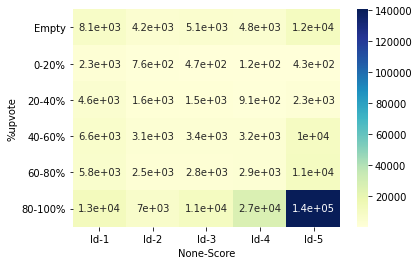

In [ ]:
sns.heatmap(pivot_of_score_uovotes,annot=True,cmap='YlGnBu')

In [ ]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [ ]:
#removing nuetral score that is 3
df_no_3 = df[df['Score']!=3]

In [ ]:
#Extracting Dependent and independent variables
#Text is our independent, score is dependent
X=df_no_3['Text']

In [ ]:
#replacing 1,2 score as 0, and 4,5 as 1
y_dict={1:0,2:0,4:1,5:1}
y=df_no_3['Score'].map(y_dict)

In [ ]:
##Aplying bag of words (BOW)
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow = CountVectorizer(stop_words='english')

In [ ]:
X_bow = bow.fit_transform(X)

In [ ]:
X_bow.shape

(525814, 114969)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bow,y,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(random_state=42)

In [ ]:
model = log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model.score(X_test,y_test)

0.9366470400292117

In [ ]:
#fetching top 20 positive and negative words

In [ ]:
words = bow.get_feature_names()
words

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [ ]:
coef = model.coef_.tolist()[0]
coef

[-0.3944876221988351,
 0.3446961985721385,
 0.4383259890312004,
 -0.00915374518766494,
 -0.01157351361372783,
 0.0,
 0.0,
 -0.006356536762503146,
 0.00037999977385333645,
 0.00035805864415074297,
 0.0018274823247708546,
 -0.014365704177988705,
 0.003113606321104629,
 0.011758410696361936,
 -0.36697549149059466,
 0.004212983297045322,
 0.0017906957124905858,
 0.0,
 0.0007640268953956439,
 3.673213943608389e-05,
 0.1089981581635849,
 0.018194213108073863,
 0.03267804419659994,
 0.03267804419659994,
 0.03267804419659994,
 0.03267804419659994,
 0.03267804419659994,
 0.03267804419659994,
 0.03267804419659994,
 0.03267804419659994,
 0.03267804419659994,
 -0.00034271630565899547,
 0.05162578493219654,
 0.0001372302051417919,
 -0.08974570378662862,
 -0.0005668815088266854,
 0.00014607819409398544,
 0.0024823242575618054,
 0.13285954889044677,
 2.3301871915603322e-05,
 -0.10772768691339872,
 0.01142431832053646,
 9.027254233783395e-05,
 0.006974252524289808,
 -0.03303862182632992,
 0.0,
 0.0110

In [ ]:
coef_df=pd.DataFrame({'word':words,'coefficient':coef})
coef_df

,word,coefficient
0,00,-0.394488
1,000,0.344696
2,0000,0.438326
3,000001,-0.009154
4,00001,-0.011574
...,...,...
114964,çaykur,0.001061
114965,çelem,0.000000
114966,être,0.000000
114967,île,0.013071


In [ ]:
coef_df=coef_df.sort_values(['coefficient','word'],ascending=False)

In [ ]:
coef_df.head(20)

,word,coefficient
80600,pleasantly,4.097601
39072,downside,3.487443
5865,addicting,3.039917
94667,skeptical,3.034623
23089,brings,2.555406
55029,hooked,2.454062
87967,resist,2.372645
39214,drawback,2.371708
35726,delish,2.350850
40135,easiest,2.320825


In [ ]:
coef_df.tail(20)

,word,coefficient
89868,ruins,-2.441752
43691,expires,-2.457788
106940,unbearable,-2.518710
46083,flavorless,-2.553669
62401,lacked,-2.562744
35220,defeats,-2.611681
37563,disappointment,-2.613969
65064,lousy,-2.715677
76576,overpowers,-2.729463
41118,embarrassed,-2.816951


In [ ]:
#automating my Bag of words model
def text_fit(X,y,bow,ml_model,coef_show=1):
  X_bow = bow.fit_transform(X)
  print('features:{}'.format(X_bow.shape[1]))
  X_train, X_test, y_train, y_test = train_test_split(X_bow,y,random_state=42)
  model=ml_model.fit(X_train,y_train)
  accuracy = model.score(X_test,y_test)
  print(accuracy)
  if coef_show==1:
    words = bow.get_feature_names()
    coef = model.coef_.tolist()[0]
    coef_df=pd.DataFrame({'word':words,'coefficient':coef})
    coef_df=coef_df.sort_values(['coefficient','word'],ascending=False)
    print('\n')
    print('-Top 20 positive words')
    print(coef_df.head(20))
    print('\n')
    print('-Top 20 negative words')
    print(coef_df.tail(20))





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
BOW = CountVectorizer(stop_words='english')

In [ ]:
#testing the auto bow model
text_fit(X,y,BOW,LogisticRegression())

features:114969


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9366470400292117


-Top 20 positive words
                word  coefficient
80600     pleasantly     4.097601
39072       downside     3.487443
5865       addicting     3.039917
94667      skeptical     3.034623
23089         brings     2.555406
55029         hooked     2.454062
87967         resist     2.372645
39214       drawback     2.371708
35726         delish     2.350850
40135        easiest     2.320825
35691      delighted     2.244347
24746           calm     2.230824
87174       relaxing     2.219521
96353       soothing     2.202830
40342     economical     2.176825
102857      terrific     2.172949
113138       worries     2.168990
68460            met     2.120276
31741   conventional     2.093192
102067      tastiest     2.060690


-Top 20 negative words
                  word  coefficient
89868            ruins    -2.441752
43691          expires    -2.457788
106940      unbearable    -2.518710
46083       flavorless    -2.553669
62401           lacked    -2.562744
3

In [ ]:
#auto predictions
def predict(X,y,bow,ml_model):
  X_bow = bow.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_bow,y,random_state=42)
  model=ml_model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  from sklearn.metrics import confusion_matrix, accuracy_score
  cm = confusion_matrix(predictions,y_test)
  print(cm)
  print('\n')
  accuracy = accuracy_score(predictions,y_test)
  print(accuracy)

In [ ]:
predict(X,y,CountVectorizer(stop_words='english'),LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[ 14893   2712]
 [  5616 108233]]


0.9366470400292117


In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
text_fit(X,y,CountVectorizer(stop_words='english'),DummyClassifier(),0)

features:114969
0.7363640513031174


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
##TF-IDF(term frequency-Inverse document frequency)tf*idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text_fit(X,y,tfidf,LogisticRegression(),0)

features:114969
0.93523970362256


In [ ]:
predict(X,y,BOW,LogisticRegression())

[[ 14893   2712]
 [  5616 108233]]


0.9366470400292117


In [ ]:
##Data Prepartion for predicting upvotes
#we have higher no  of users who gave 5 score

In [ ]:
df_5 = df[df['Score']==5]
df_5.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.0,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.0,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%


In [ ]:
df_5.shape

(363122, 12)

In [ ]:
df_5['%upvote'].unique()

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [ ]:
#getting rid if neutral votes


In [ ]:
data2 = df_5[df_5['%upvote'].isin(['80-100%','60-80%', '20-40%', '0-20%'])]


In [ ]:
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,1.0,80-100%
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,60-80%


In [ ]:
X = data2['Text']

In [ ]:
y_dict = {'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}

In [ ]:
y = data2['%upvote'].map(y_dict)

In [ ]:
y.value_counts()

1.0    151721
0.0      2707
Name: %upvote, dtype: int64

In [ ]:
#Apply tfidf
X_tfidf = tfidf.fit_transform(X)

In [ ]:
#Applying techniques of Imbalanced data handling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os = RandomOverSampler()

In [ ]:
X_train_res,y_train_res = os.fit_sample(X_tfidf,y)

In [ ]:
X_train_res.shape, y_train_res.shape

((303442, 67196), (303442,))

In [ ]:
from collections import Counter

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Over sampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Over sampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [ ]:
#Cross validate using gridsearchcv
from sklearn.model_selection import  GridSearchCV

In [ ]:
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

In [ ]:
clf = GridSearchCV(estimator=log,param_grid=grid,cv=5, n_jobs=-1,scoring='f1_macro')

In [ ]:
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y)

In [ ]:
pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[  651,     0],
       [  585, 37371]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9848473074830989